In [ ]:
## install finrl library
!pip install wrds
!pip install swig
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00
⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package swig4.0.
(Reading database ... 126319 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubuntu1_all.deb ...
Unpacking swig (4.0.2-1ubuntu1) ...
Setting up swig4.0 (4.0.2-1ubuntu1) ...
Setting

In [ ]:
!pip install pandas-market-calendars

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import datetime

from finrl import config
from finrl import config_tickers
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_portfolio_allocation.env_portfolio import StockPortfolioEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts
from finrl.meta.data_processor import DataProcessor
from finrl.meta.data_processors.processor_yahoofinance import YahooFinanceProcessor
import sys
sys.path.append("FinRL-Library")

/usr/local/lib/python3.11/dist-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)
/usr/local/lib/python3.11/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
dp = YahooFinanceProcessor()
df = dp.download_data(start_date = '2008-01-01',
                     end_date = '2025-05-31',
                     ticker_list = config_tickers.DOW_30_TICKER, time_interval='1D')

Streaming output truncated to the last 5000 lines.
ERROR:yfinance:['INTC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-06-04 00:00:00 -> 2023-06-05 00:00:00)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-06-10 00:00:00 -> 2023-06-11 00:00:00)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INTC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-06-11 00:00:00 -> 2023-06-

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [ ]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [ ]:
for ticker in config_tickers.DOW_30_TICKER:
    try:
        df = YahooDownloader(start_date='2008-01-01',
                             end_date='2025-05-31',
                             ticker_list=[ticker]).fetch_data()
        print(f"Data fetched successfully for {ticker}")
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

YF deprecation warning: set proxy via new config function: yf.set_config(proxy=proxy)


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for AXP


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for AMGN


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for AAPL


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for BA


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for CAT


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for CSCO


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for CVX


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for GS


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for HD


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for HON


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for IBM


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for INTC


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for JNJ


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for KO


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for JPM


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for MCD


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for MMM


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for MRK


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for MSFT


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for NKE


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for PG


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for TRV


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for UNH


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for CRM


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for VZ


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4328, 8)
Data fetched successfully for V


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for WBA


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for WMT


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Data fetched successfully for DIS


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (1559, 8)
Data fetched successfully for DOW


In [ ]:
df.sort_values(['date','tic'],ignore_index=True).head()

Price,date,close,high,low,open,volume,tic,day
0,2019-03-20,35.140583,37.751430,34.928893,37.222204,2350800,DOW,2
1,2019-03-21,34.561966,35.281713,34.011572,35.274658,1764700,DOW,3
2,2019-03-22,34.293816,35.246423,33.983338,34.434943,844700,DOW,4
3,2019-03-25,34.681915,34.858324,33.870435,34.293814,440900,DOW,0
4,2019-03-26,34.470234,35.105306,33.997460,34.576080,504700,DOW,1


In [ ]:
all_data = []
for ticker in config_tickers.DOW_30_TICKER:
    d_f = YahooDownloader(start_date='2008-01-01',
                             end_date='2025-05-31',
                         ticker_list=[ticker]).fetch_data()
    all_data.append(d_f)
    if len(df.columns) != 8:
        print(f"Data for {ticker} has a column length mismatch or is incomplete")
df = pd.concat(all_data, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)



[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4328, 8)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (4381, 8)



[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (4381, 8)
Shape of DataFrame:  (1559, 8)


In [ ]:
df.sort_values(['date','tic'],ignore_index=True).head()

Price,date,close,high,low,open,volume,tic,day
0,2008-01-02,5.855759,6.018653,5.786935,5.988899,1079178800,AAPL,2
1,2008-01-02,32.223785,32.528046,31.988676,32.223785,7934400,AMGN,2
2,2008-01-02,38.898678,39.874192,38.708147,39.698905,8053700,AXP,2
3,2008-01-02,63.481617,64.375720,63.027233,64.177846,4303000,BA,2
4,2008-01-02,44.507317,45.792818,44.141835,45.723501,6337800,CAT,2


In [ ]:
df.shape

(128555, 8)

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)

Successfully added technical indicators


In [ ]:
df.shape

(122668, 16)

In [ ]:
df.head()

,date,close,high,low,open,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2008-01-02,5.855759,6.018653,5.786935,5.988899,1079178800,AAPL,2,0.0,5.860932,5.853288,100.0,-66.666667,100.0,5.855759,5.855759
4381,2008-01-02,32.223785,32.528046,31.988676,32.223785,7934400,AMGN,2,0.0,5.860932,5.853288,100.0,-66.666667,100.0,32.223785,32.223785
8762,2008-01-02,38.898678,39.874192,38.708147,39.698905,8053700,AXP,2,0.0,5.860932,5.853288,100.0,-66.666667,100.0,38.898678,38.898678
13143,2008-01-02,63.481617,64.375720,63.027233,64.177846,4303000,BA,2,0.0,5.860932,5.853288,100.0,-66.666667,100.0,63.481617,63.481617
17524,2008-01-02,44.507317,45.792818,44.141835,45.723501,6337800,CAT,2,0.0,5.860932,5.853288,100.0,-66.666667,100.0,44.507317,44.507317


In [ ]:
# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
return_list = []

# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  return_list.append(return_lookback)

  covs = return_lookback.cov().values
  cov_list.append(covs)


df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list,'return_list':return_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)

In [ ]:
df.shape

(115612, 18)

In [ ]:
df.head()

,date,close,high,low,open,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2008-12-31,2.565126,2.636955,2.564825,2.583760,607541200,AAPL,2,-0.082003,3.071161,2.436449,42.254788,-80.846619,16.129797,2.729571,2.840867,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...
1,2008-12-31,39.933987,40.258991,39.456854,39.491429,6287200,AMGN,2,0.149617,40.761991,38.992589,51.060601,51.894904,10.432285,39.188098,38.754529,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...
2,2008-12-31,14.326866,14.481334,13.832570,13.878910,9625600,AXP,2,-0.919292,18.322190,12.440031,42.554822,-74.811851,25.740255,15.469930,17.309638,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...
3,2008-12-31,32.005894,32.290925,31.128302,31.195809,5443100,BA,2,-0.279800,32.174383,28.867838,47.440247,157.922952,5.792050,30.327214,32.389915,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...
4,2008-12-31,28.895695,29.173849,28.268232,28.268232,6277400,CAT,2,0.639824,29.617321,24.842685,51.205313,98.904753,26.480705,26.046878,25.787324,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...


In [ ]:
train = data_split(df, '2009-01-01','2023-12-31')

In [ ]:
train.head()

,date,close,high,low,open,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2009-01-02,2.727417,2.736133,2.559414,2.581053,746015200,AAPL,4,-0.069643,3.057737,2.434395,45.440178,-30.509140,2.140298,2.730413,2.841663,"[[0.0013661515398807993, 0.0004339365608163561...",tic AAPL AMGN AXP ...
0,2009-01-02,40.791451,40.853685,39.933992,40.514850,6547900,AMGN,4,0.221589,40.900954,38.958734,52.756858,94.549620,0.814365,39.249180,38.838661,"[[0.0013661515398807993, 0.0004339365608163561...",tic AAPL AMGN AXP ...
0,2009-01-02,14.929289,15.076033,14.211015,14.342312,10955700,AXP,4,-0.817562,18.141772,12.424275,43.957531,-42.019042,16.302712,15.468642,17.194817,"[[0.0013661515398807993, 0.0004339365608163561...",tic AAPL AMGN AXP ...
0,2009-01-02,33.941093,34.173619,32.088396,32.103398,7010200,BA,4,-0.002008,32.948625,28.452132,50.822030,275.696682,20.866039,30.469479,32.344131,"[[0.0013661515398807993, 0.0004339365608163561...",tic AAPL AMGN AXP ...
0,2009-01-02,30.344687,30.389967,28.921571,29.050946,7117200,CAT,4,0.813121,30.107330,24.822304,53.661254,131.676111,34.780880,26.278026,25.787891,"[[0.0013661515398807993, 0.0004339365608163561...",tic AAPL AMGN AXP ...


In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step


    """
    metadata = {'render.modes': ['human']}

    def __init__(self,
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,))
        # Shape = (34, 30)
        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False
        self.turbulence_threshold = turbulence_threshold
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]


    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()

            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")

            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:
            #  norm_actions = actions
            weights = self.softmax_normalization(actions)
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]
        return self.state

    def render(self, mode='human'):
        return self.state

    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output


    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']

        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [ ]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 28, State Space: 28


In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "transaction_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4

}

e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)

In [ ]:
!pip install 'shimmy>=2.0'

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


/usr/local/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
# initialize
agent = DRLAgent(env = env_train)

In [ ]:
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='a2c',
                                total_timesteps=50000)

-------------------------------------
| time/                 |           |
|    fps                | 203       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -39.7     |
|    explained_variance | 0         |
|    learning_rate      | 0.0002    |
|    n_updates          | 99        |
|    policy_loss        | 2.01e+08  |
|    reward             | 1620119.8 |
|    reward_max         | 1622147.6 |
|    reward_mean        | 1620793.2 |
|    reward_min         | 1619092.0 |
|    std                | 0.998     |
|    value_loss         | 2.78e+13  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 223       |
|    iterations         | 200       |
|    time_elapsed       | 4         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy

In [ ]:
trained_a2c.save('/content/trained_models/trained_a2c.zip')

In [ ]:

agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=80000)

----------------------------------
| time/              |           |
|    fps             | 273       |
|    iterations      | 1         |
|    time_elapsed    | 7         |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 4350531.5 |
|    reward_max      | 4350531.5 |
|    reward_mean     | 2434318.8 |
|    reward_min      | 751179.9  |
----------------------------------
begin_total_asset:1000000
end_total_asset:9721770.124022685
Sharpe:  0.9492945819729692
---------------------------------------
| time/                   |           |
|    fps                  | 259       |
|    iterations           | 2         |
|    time_elapsed         | 15        |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -39.7     |
|    explained_variance   | -1.19e-07 |
|    learnin

In [ ]:
trained_ppo.save('/content/trained_models/trained_ppo.zip')

In [ ]:
trade = data_split(df,'2024-01-01', '2025-05-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

In [ ]:
trade.shape

(9912, 18)

In [ ]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_a2c,
                        environment = e_trade_gym)

/usr/local/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1117244.4553012764
Sharpe:  0.5846025325092691
hit end!


In [ ]:
df_daily_return.head()

,date,daily_return
0,2024-01-02,0.000000
1,2024-01-03,-0.009638
2,2024-01-04,-0.002705
3,2024-01-05,0.002072
4,2024-01-08,0.007088


In [ ]:
df_daily_return.to_csv('df_daily_return.csv')

In [ ]:
df_actions.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714
2024-01-03,0.069021,0.025391,0.025391,0.045721,0.069021,0.057700,0.025391,0.025391,0.025391,0.025391,...,0.048839,0.030728,0.031078,0.069021,0.025391,0.025391,0.025391,0.041654,0.025391,0.030830
2024-01-04,0.069021,0.025391,0.025391,0.045721,0.069021,0.057700,0.025391,0.025391,0.025391,0.025391,...,0.048839,0.030728,0.031078,0.069021,0.025391,0.025391,0.025391,0.041654,0.025391,0.030830
2024-01-05,0.069021,0.025391,0.025391,0.045721,0.069021,0.057700,0.025391,0.025391,0.025391,0.025391,...,0.048839,0.030728,0.031078,0.069021,0.025391,0.025391,0.025391,0.041654,0.025391,0.030830
2024-01-08,0.069015,0.025389,0.025389,0.045747,0.069015,0.057717,0.025389,0.025389,0.025389,0.025389,...,0.048847,0.030719,0.031085,0.069015,0.025389,0.025389,0.025389,0.041666,0.025389,0.030832


In [ ]:
df_actions.to_csv('df_actions.csv')

In [ ]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

In [ ]:
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


,0
Annual return,0.082119
Cumulative returns,0.117244
Annual volatility,0.155571
Sharpe ratio,0.584603
Calmar ratio,0.508265
Stability,0.617154
Max drawdown,-0.161567
Omega ratio,1.118648
Sortino ratio,0.856185
Skew,0.759398


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (353, 8)
Annual return          0.083806
Cumulative returns     0.119334
Annual volatility      0.155641
Sharpe ratio           0.595891
Calmar ratio           0.511971
Stability              0.528195
Max drawdown          -0.163692
Omega ratio            1.119981
Sortino ratio          0.877951
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.872985
Daily value at risk   -0.019241
dtype: float64


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (252, 8)



/usr/local/lib/python3.11/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.607%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2024-01-02
End date,2024-12-31
Total months,12
,Backtest
Annual return,10.607%
Cumulative returns,10.607%
Annual volatility,11.289%
Sharpe ratio,0.95
Calmar ratio,1.91
Stability,0.73
Max drawdown,-5.568%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.57,2024-07-17,2024-08-05,2024-08-19,24
1,5.26,2024-03-28,2024-05-01,2024-07-16,79
2,4.35,2024-10-18,2024-10-31,2024-11-22,26
3,3.60,2024-11-29,2024-12-18,NaT,NaN
4,3.48,2024-08-30,2024-09-06,2024-09-19,15


/usr/local/lib/python3.11/dist-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
/usr/local/lib/python3.11/site-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


Stress Events,mean,min,max
Covid,0.04%,-5.52%,8.20%


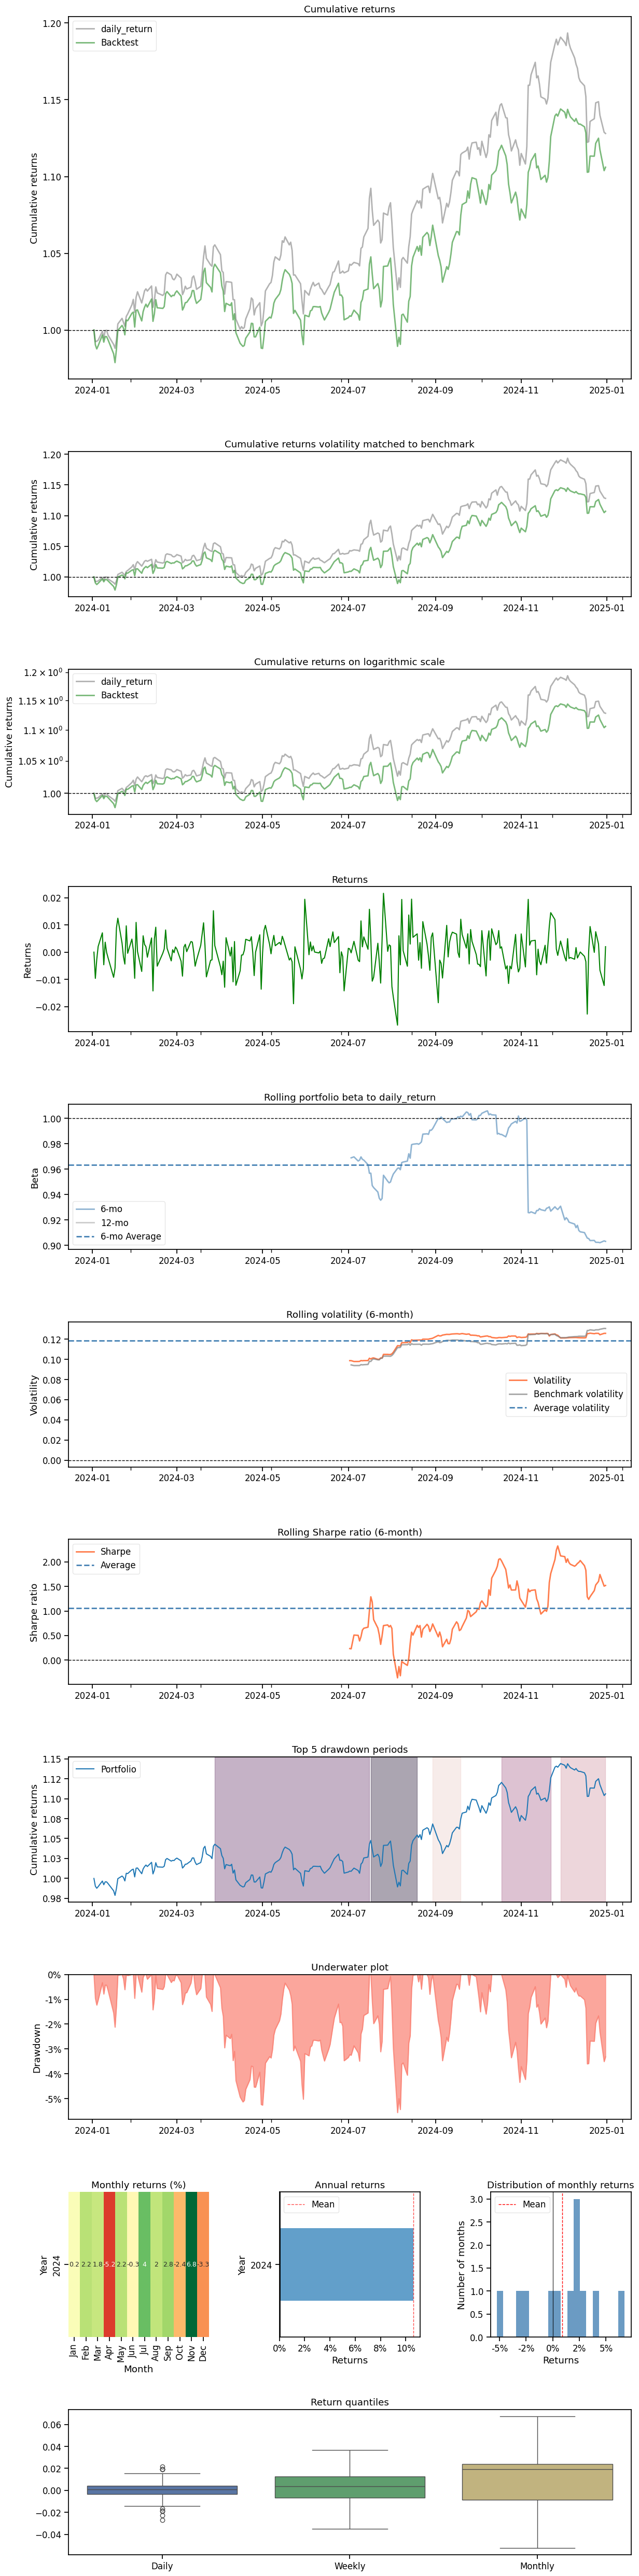

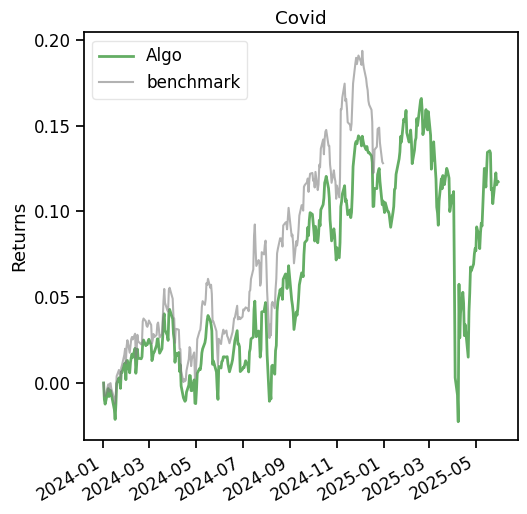

In [ ]:
import pyfolio
%matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2025-01-01'
    )

baseline_returns = get_daily_return(baseline_df, value_col_name="close")

with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat,
                                       benchmark_rets=baseline_returns, set_context=False)

In [ ]:
%pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

In [ ]:
unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

In [ ]:
df.head()

,date,close,high,low,open,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2008-12-31,2.565126,2.636955,2.564825,2.583760,607541200,AAPL,2,-0.082003,3.071161,2.436449,42.254788,-80.846619,16.129797,2.729571,2.840867,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...
1,2008-12-31,39.933987,40.258991,39.456854,39.491429,6287200,AMGN,2,0.149617,40.761991,38.992589,51.060601,51.894904,10.432285,39.188098,38.754529,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...
2,2008-12-31,14.326866,14.481334,13.832570,13.878910,9625600,AXP,2,-0.919292,18.322190,12.440031,42.554822,-74.811851,25.740255,15.469930,17.309638,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...
3,2008-12-31,32.005894,32.290925,31.128302,31.195809,5443100,BA,2,-0.279800,32.174383,28.867838,47.440247,157.922952,5.792050,30.327214,32.389915,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...
4,2008-12-31,28.895695,29.173849,28.268232,28.268232,6277400,CAT,2,0.639824,29.617321,24.842685,51.205313,98.904753,26.480705,26.046878,25.787324,"[[0.0013489702154150518, 0.0004284110651735493...",tic AAPL AMGN AXP ...


In [ ]:
#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

In [ ]:
portfolio.head()

,account_value
2024-01-02,1000000
2024-01-03,1001241.008691
2024-01-04,999095.843664
2024-01-05,995953.663232
2024-01-08,1003260.05794


In [ ]:
a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

In [ ]:
min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

/tmp/ipython-input-51-3389022641.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1


In [ ]:
dji_cumpod =(baseline_returns+1).cumprod()-1

In [ ]:
%pip install plotly

In [ ]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

In [ ]:
time_ind = pd.Series(df_daily_return.date)

In [ ]:
trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'A2C (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

In [ ]:
fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()